

# Proyecto final Economía y Crimen en el Posconflicto


**Cindy Lorena Roa Ovalle** <br> 

1. Instalación de paquetes y librerias de Python
2. Web Scrapping a la página de la Secretaría del Senado de la República de las leyes que adoptaron los Planes Nacionales de Desarrollo para los periodos 2014-2018 y 2018-2022
3. Análisis de texto NLTK
4. Nube de palabras
5. Web Scrapping de API del portal de Datos Abiertos del Ministerio Nacional de Educación
6. Importar base de datos elaborada con información del DANE, Medicina Legal, Ministerio de Defensa, DPN, para elaboración del modelo.
7. Construcción del Dataframe y unificación con las variables extraidas de la API.
8. Analisis descriptivo y correlación entre variables.
9. Elaboración del modelo
10. Conclusión

In [11]:
#Instalación de paquetes para ejecutar Python y hacer Web scrappin-
!pip install selenium
!pip install sodapy
!pip install wordcloud

In [12]:
#Importamos las librerias
import matplotlib
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import pandas as pd
from selenium import webdriver
import time
import string
import nltk
from nltk.corpus import stopwords
import re
from sodapy import Socrata
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [13]:
nltk.download() #Instalamos todo el paquete del NLTK

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [14]:
# Web Scrapping Secretarìa Senado - PLan nacional de desarrollo de Santos (2014-2018)

url = 'http://www.secretariasenado.gov.co/senado/basedoc/ley_1753_2015.html'
html = requests.get(url).text 

#Descargamos el contenido de la página
browser = webdriver.Chrome(executable_path=r"\Users\cindy\Downloads\phantomjs-2.1.1-windows\phantomjs-2.1.1-windows\bin\chromedriver")
time.sleep(5)
browser.get(url)
html = browser.page_source
time.sleep(5)
browser.quit()

# Extraemos el texto correspondiente a la primera página del PND 2014-2018
soup = BeautifulSoup(html)
texto = soup.find_all("p")
list(texto)
for i in texto:
    text=i.getText()
    print(text)

# Extraemos el texto correspondiente a las página subsecuentes del PND 2014-2018
for page_number in range(1,6):
    url2 = f'http://www.secretariasenado.gov.co/senado/basedoc/ley_1753_2015_pr00{page_number}.html'
    html2 = requests.get(url2).text #Descargo el contenido de la página
    browser3 = webdriver.Chrome(executable_path=r"\Users\cindy\Downloads\phantomjs-2.1.1-windows\phantomjs-2.1.1-windows\bin\chromedriver")
    time.sleep(5)
    browser3.get(url2)
    html3 = browser3.page_source
    time.sleep(5)
    browser3.quit()
    soup = BeautifulSoup(html3)
    textos = soup.find_all("p")
    dos=list(textos)
    for i in textos:
        text2=i.getText()
        unis=print(text2)

Siguiente

LEY 1753 DE 2015
(junio 9)
Diario Oficial No. 49.538 de 9 de junio de 2015
CONGRESO DE LA REPÚBLICA
Por la cual se expide el Plan Nacional de Desarrollo 2014-2018 “Todos por un nuevo país”.
EL CONGRESO DE LA REPÚBLICA DE COLOMBIA
DECRETA: 
TÍTULO I. 
DISPOSICIONES GENERALES. 
ARTÍCULO 1o. OBJETIVOS DEL PLAN NACIONAL DE DESARROLLO. El Plan Nacional de Desarrollo 2014-2018 “Todos por un nuevo país”, que se expide por medio de la presente ley, tiene como objetivo construir una Colombia en paz, equitativa y educada, en armonía con los propósitos del Gobierno nacional, con las mejores prácticas y estándares internacionales, y con la visión de planificación, de largo plazo prevista por los objetivos de desarrollo sostenible.
ARTÍCULO 2o. PARTE INTEGRAL DE ESTA LEY. El documento denominado “Bases del Plan Nacional de Desarrollo 2014-2018: Todos por un nuevo país”, elaborado por el Gobierno nacional con la participación del Consejo Superior de la Judicatura y del Consejo Nacional de

Anterior | Siguiente

ARTÍCULO 48. BONOS HIPOTECARIOS. <Consultar vigencia directamente en el artículo que modifica> Modifíquese el inciso primero del artículo 9o de la Ley 546 de 1999, el cual quedará así: 
“Artículo 9o. Bonos hipotecarios. Se autoriza a los establecimientos de crédito la emisión de bonos hipotecarios los cuales se enmarcarán dentro de los siguientes lineamientos”: 
ARTÍCULO 49. SISTEMA NACIONAL DE PROYECTOS DE INTERÉS NACIONAL Y ESTRATÉGICOS (SINAPINE). El Gobierno Nacional organizará el Sistema Nacional de Proyectos de Interés Nacional y Estratégicos (Sinapine) como la estrategia de gestión pública para la planeación integral, optimización de los procedimientos y trámites, gestión y seguimiento de los Proyectos de Interés Nacional y Estratégicos (PINE), de origen público, privado o mixto que sean seleccionados como tales por el Gobierno nacional, por su alto impacto en el crecimiento económico y social del país. 
La Comisión Intersectorial de Infraestructura y Proye

Anterior | Siguiente

ARTÍCULO 97. SANEAMIENTO Y CUMPLIMIENTO DE CONDICIONES FINANCIERAS DE LAS ENTIDADES PROMOTORAS DE SALUD EN QUE PARTICIPEN LAS CAJAS DE COMPENSACIÓN FAMILIAR. Con el propósito de garantizar el acceso y goce efectivo del derecho a la salud y cumplir las condiciones financieras para la operación y el saneamiento de las Entidades Promotoras de Salud en que participen las Cajas de Compensación Familiar o los programas de salud que administren o hayan operado en dichas entidades, se podrán destinar recursos propios de las Cajas de Compensación Familiar y los recursos a que hace referencia el artículo 46 de la Ley 1438 de 2011 recaudados en las vigencias 2012, 2013 y 2014 que no hayan sido utilizados en los propósitos definidos en la mencionada ley a la fecha de entrada en vigencia de la presente disposición, siempre que no correspondan a la financiación del régimen subsidiado de salud. Subsidiariamente, los recursos de la contribución parafiscal recaudados por las Cajas

Anterior | Siguiente

ARTÍCULO 144. FONDES. <Artículo modificado por el artículo 56 de la Ley 1955 de 2019. El nuevo texto es el siguiente:> El Fondo Nacional para el Desarrollo de la Infraestructura (FONDES) será administrado por la Financiera de Desarrollo Nacional y/o la entidad que defina el Gobierno nacional, de conformidad con la reglamentación expedida para el efecto y en los términos del contrato que se suscriba.
El objeto del FONDES será la inversión y financiamiento de proyectos de infraestructura, así como la inversión en el capital social de empresas de servicios públicos mixtas u oficiales y su patrimonio estará constituido, entre otras, por las siguientes fuentes:
a) Cuando el Gobierno nacional lo defina, los recursos producto de la enajenación de la participación accionaria de la Nación, recibidos en virtud de un proceso regulado por la Ley 226 de 1995;
b) Los rendimientos que genere el Fondo;
c) Los recursos que obtenga el fondo a través de sus propias operaciones de cr

Anterior | Siguiente

ARTÍCULO 192. ACUERDOS CON ENTIDADES TERRITORIALES. El Gobierno nacional establecerá el procedimiento para que las entidades territoriales puedan proponer al Ministerio de Minas y Energía, con fundamento en estudios técnicos, sociales y ambientales; medidas de protección del ambiente sano, las cuencas hídricas, el desarrollo económico, social, cultural de sus comunidades y la salubridad de la población, frente a las posibles afectaciones que pueden derivarse de la actividad minera. 
Los estudios antes referidos podrán basarse en los realizados para fundamentar la expedición de los Planes de Ordenamiento Territorial, Esquemas de Ordenamiento Territorial o en los estudios que hayan sido elaborados por las Corporaciones Autónomas Regionales en el ejercicio de sus funciones. 
ARTÍCULO 193. ACCESO A LAS TIC Y DESPLIEGUE DE INFRAESTRUCTURA. Con el propósito de garantizar el ejercicio y goce efectivo de los derechos constitucionales a la comunicación, la vida en situacio

Anterior

ARTÍCULO 242. OPERACIONES DE REDESCUENTO. <Consultar vigencia directamente en el artículo que modifica> Modifíquese el literal g) del artículo 270 del EOSF, el cual quedará así:
“g. Redescontar créditos a entidades públicas del orden nacional, a entidades de derecho privado, patrimonios autónomos y personas jurídicas de derecho internacional público, siempre y cuando dichos recursos se utilicen en las actividades definidas en el numeral 2 del artículo 268 del Estatuto Orgánico del Sistema Financiero y en proyectos relacionados con el medio ambiente”.
ARTÍCULO 243. RECONOCIMIENTO DE DEUDA EN SENTENCIAS Y CONCILIACIONES JUDICIALES. Para efectos de lo establecido en el artículo 29 de la Ley 344 de 1996, en el marco de las leyes que lo implementen, entiéndase que la referencia a las sentencias y conciliaciones judiciales es aplicable a otros mecanismos de solución alternativa de conflictos, tales como la amigable composición, que tengan efectos de cosa juzgada en última instancia

In [15]:
#A partir de la información obtenida se compila el texto del Plan Nacional de Desarrollo 2014-2018 en un archivo en formato TXT y se nombra como "PND_2014"
with open('PND_2014.TXT') as f:
    PND_2014 = f.read()

In [16]:
print(PND_2014)

Siguiente

LEY 1753 DE 2015
(junio 9)
Diario Oficial No. 49.538 de 9 de junio de 2015
CONGRESO DE LA REPÚBLICA
Por la cual se expide el Plan Nacional de Desarrollo 2014-2018 “Todos por un nuevo país”.
EL CONGRESO DE LA REPÚBLICA DE COLOMBIA
DECRETA: 
TÍTULO I. 
DISPOSICIONES GENERALES. 
ARTÍCULO 1o. OBJETIVOS DEL PLAN NACIONAL DE DESARROLLO. El Plan Nacional de Desarrollo 2014-2018 “Todos por un nuevo país”, que se expide por medio de la presente ley, tiene como objetivo construir una Colombia en paz, equitativa y educada, en armonía con los propósitos del Gobierno nacional, con las mejores prácticas y estándares internacionales, y con la visión de planificación, de largo plazo prevista por los objetivos de desarrollo sostenible.
ARTÍCULO 2o. PARTE INTEGRAL DE ESTA LEY. El documento denominado “Bases del Plan Nacional de Desarrollo 2014-2018: Todos por un nuevo país”, elaborado por el Gobierno nacional con la participación del Consejo Superior de la Judicatura y del Consejo Nacional de

In [17]:
# Separamos el texto del PND 2014-2018 en palabras 
tokens_2014 = PND_2014.split()
tokens_2014

['Siguiente',
 'LEY',
 '1753',
 'DE',
 '2015',
 '(junio',
 '9)',
 'Diario',
 'Oficial',
 'No.',
 '49.538',
 'de',
 '9',
 'de',
 'junio',
 'de',
 '2015',
 'CONGRESO',
 'DE',
 'LA',
 'REPÚBLICA',
 'Por',
 'la',
 'cual',
 'se',
 'expide',
 'el',
 'Plan',
 'Nacional',
 'de',
 'Desarrollo',
 '2014-2018',
 '“Todos',
 'por',
 'un',
 'nuevo',
 'país”.',
 'EL',
 'CONGRESO',
 'DE',
 'LA',
 'REPÚBLICA',
 'DE',
 'COLOMBIA',
 'DECRETA:',
 'TÍTULO',
 'I.',
 'DISPOSICIONES',
 'GENERALES.',
 'ARTÍCULO',
 '1o.',
 'OBJETIVOS',
 'DEL',
 'PLAN',
 'NACIONAL',
 'DE',
 'DESARROLLO.',
 'El',
 'Plan',
 'Nacional',
 'de',
 'Desarrollo',
 '2014-2018',
 '“Todos',
 'por',
 'un',
 'nuevo',
 'país”,',
 'que',
 'se',
 'expide',
 'por',
 'medio',
 'de',
 'la',
 'presente',
 'ley,',
 'tiene',
 'como',
 'objetivo',
 'construir',
 'una',
 'Colombia',
 'en',
 'paz,',
 'equitativa',
 'y',
 'educada,',
 'en',
 'armonía',
 'con',
 'los',
 'propósitos',
 'del',
 'Gobierno',
 'nacional,',
 'con',
 'las',
 'mejores',
 'práctica

In [18]:
len(tokens_2014)

59486

In [19]:
len(set(tokens_2014))

9490

In [20]:
# Eliminamos signos de puntuación y otros caracteres no deseados.
string.punctuation
punctuation = string.punctuation + '–¡¿”“•\r´'
def no_punct(text):
    return re.sub('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~–¡¿”“•\r´]+', '', text)

tokens_no_2014 = list(map(no_punct, tokens_2014))
tokens_no_2014

minusc2014 = [w.lower() for w in tokens_no_2014]

alpha2014 = [w for w in minusc2014 if not w.isdigit()]
alpha2014

['siguiente',
 'ley',
 'de',
 'junio',
 'diario',
 'oficial',
 'no',
 'de',
 'de',
 'junio',
 'de',
 'congreso',
 'de',
 'la',
 'república',
 'por',
 'la',
 'cual',
 'se',
 'expide',
 'el',
 'plan',
 'nacional',
 'de',
 'desarrollo',
 'todos',
 'por',
 'un',
 'nuevo',
 'país',
 'el',
 'congreso',
 'de',
 'la',
 'república',
 'de',
 'colombia',
 'decreta',
 'título',
 'i',
 'disposiciones',
 'generales',
 'artículo',
 '1o',
 'objetivos',
 'del',
 'plan',
 'nacional',
 'de',
 'desarrollo',
 'el',
 'plan',
 'nacional',
 'de',
 'desarrollo',
 'todos',
 'por',
 'un',
 'nuevo',
 'país',
 'que',
 'se',
 'expide',
 'por',
 'medio',
 'de',
 'la',
 'presente',
 'ley',
 'tiene',
 'como',
 'objetivo',
 'construir',
 'una',
 'colombia',
 'en',
 'paz',
 'equitativa',
 'y',
 'educada',
 'en',
 'armonía',
 'con',
 'los',
 'propósitos',
 'del',
 'gobierno',
 'nacional',
 'con',
 'las',
 'mejores',
 'prácticas',
 'y',
 'estándares',
 'internacionales',
 'y',
 'con',
 'la',
 'visión',
 'de',
 'planificac

In [21]:
len(alpha2014)

57852

In [22]:
len(set(alpha2014))

5316

In [23]:
#Se depuran palabras de parada en español (conectores) y se filtran las palabras de intéres.
stopwords_esp = stopwords.words('spanish')
stopwords_esp

tokens_no_stop2014 = [w for w in alpha2014 if w not in stopwords_esp]

freqdist2014 = nltk.FreqDist(tokens_no_stop2014)
freqdist2014.most_common()

[('artículo', 748),
 ('nacional', 540),
 ('ley', 396),
 ('recursos', 280),
 ('parágrafo', 232),
 ('desarrollo', 228),
 ('entidades', 226),
 ('ministerio', 188),
 ('gobierno', 183),
 ('así', 163),
 ('sistema', 146),
 ('podrán', 132),
 ('podrá', 131),
 ('proyectos', 128),
 ('social', 125),
 ('información', 118),
 ('plan', 117),
 ('presente', 116),
 ('vigencia', 114),
 ('territoriales', 112),
 ('salud', 112),
 ('fondo', 110),
 ('entidad', 108),
 ('público', 102),
 ('servicios', 92),
 ('general', 88),
 ('áreas', 84),
 ('condiciones', 82),
 ('infraestructura', 81),
 ('directamente', 80),
 ('territorial', 75),
 ('derechos', 74),
 ('nación', 74),
 ('política', 71),
 ('transporte', 71),
 ('ser', 70),
 ('pública', 70),
 ('parte', 69),
 ('consultar', 69),
 ('1o', 68),
 ('caso', 68),
 ('deberá', 68),
 ('servicio', 68),
 ('autoridad', 67),
 ('2o', 66),
 ('marco', 66),
 ('programas', 66),
 ('modifica', 66),
 ('pago', 66),
 ('educación', 63),
 ('objeto', 63),
 ('departamento', 63),
 ('públicas', 61)

In [24]:
# A partir de la frecuencia de distribución se depura nuevamente el listado para las palabras de interés y se deermina su frecuencia.

not_of_interest2014 = ['', 'ley', 'ser', 'da', 'página', 'artículo', 'parágrafo', 'así', 'podrá', 'podrán', "2o", "1o", "tal", "u", "c", "d","3o"]

tokens_of_interest2014 = [w for w in alpha2014 if w not in not_of_interest2014]
tokens_of_interest2014 = [w for w in tokens_of_interest2014 if w not in stopwords_esp]
freqdist2014 = nltk.FreqDist(tokens_of_interest2014)
freqdist2014.most_common()

[('nacional', 540),
 ('recursos', 280),
 ('desarrollo', 228),
 ('entidades', 226),
 ('ministerio', 188),
 ('gobierno', 183),
 ('sistema', 146),
 ('proyectos', 128),
 ('social', 125),
 ('información', 118),
 ('plan', 117),
 ('presente', 116),
 ('vigencia', 114),
 ('territoriales', 112),
 ('salud', 112),
 ('fondo', 110),
 ('entidad', 108),
 ('público', 102),
 ('servicios', 92),
 ('general', 88),
 ('áreas', 84),
 ('condiciones', 82),
 ('infraestructura', 81),
 ('directamente', 80),
 ('territorial', 75),
 ('derechos', 74),
 ('nación', 74),
 ('política', 71),
 ('transporte', 71),
 ('pública', 70),
 ('parte', 69),
 ('consultar', 69),
 ('caso', 68),
 ('deberá', 68),
 ('servicio', 68),
 ('autoridad', 67),
 ('marco', 66),
 ('programas', 66),
 ('modifica', 66),
 ('pago', 66),
 ('educación', 63),
 ('objeto', 63),
 ('departamento', 63),
 ('públicas', 61),
 ('zonas', 61),
 ('través', 61),
 ('gestión', 60),
 ('crédito', 60),
 ('acuerdo', 59),
 ('quedará', 59),
 ('atención', 59),
 ('cuales', 59),
 ('

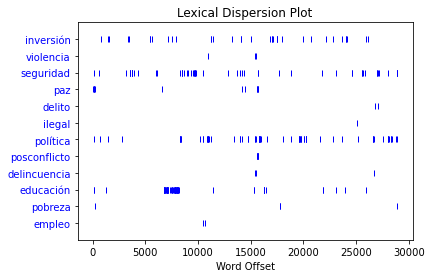

In [25]:
# Gráfico de dispersión de palabras de interés para la investigación
tokens_nltk2014 = nltk.Text(tokens_of_interest2014)
type(tokens_of_interest2014)
tokens_nltk2014.dispersion_plot(['inversión', "violencia", "seguridad", "paz", "delito", "ilegal", "política", "posconflicto", "delincuencia", "educación", "pobreza", "empleo"])

In [26]:
## Web Scrapping Secretarìa Senado - Plan nacional de desarollo de Duque (2018-2022)

url = 'http://www.secretariasenado.gov.co/senado/basedoc/ley_1955_2019.html'
html = requests.get(url).text 

#Descargo el contenido de la página
browser = webdriver.Chrome(executable_path=r"\Users\cindy\Downloads\phantomjs-2.1.1-windows\phantomjs-2.1.1-windows\bin\chromedriver")
time.sleep(5)
browser.get(url)
html2 = browser.page_source
time.sleep(5)
browser.quit()
html2
soup = BeautifulSoup(html2)
texto = soup.find_all("p")
for i in texto:
    print(i.getText())

for page_number in range(1,8):
    url2 = f'http://www.secretariasenado.gov.co/senado/basedoc/ley_1955_2019_pr00{page_number}.html'
    html2 = requests.get(url2).text #Descargo el contenido de la página
    browser3 = webdriver.Chrome(executable_path=r"\Users\cindy\Downloads\phantomjs-2.1.1-windows\phantomjs-2.1.1-windows\bin\chromedriver")
    time.sleep(5)
    browser3.get(url2)
    html3 = browser3.page_source
    time.sleep(5)
    browser3.quit()
    html3
    soup = BeautifulSoup(html3)
    textos = soup.find_all("p")
    list(textos)
    for i in textos:
        print(i.getText())

Siguiente

LEY 1955 DE 2019
(mayo 25)
Diario Oficial No. 50.964 de 25 de mayo 2019
PODER PÚBLICO – RAMA LEGISLATIVA
Por el cual se expide el Plan Nacional de Desarrollo 2018-2022.
“Pacto por Colombia, Pacto por la Equidad”.
EL CONGRESO DE COLOMBIA
DECRETA:
TÍTULO I. 
PARTE GENERAL. 
ARTÍCULO 1o. OBJETIVOS DEL PLAN NACIONAL DE DESARROLLO. El Plan Nacional de Desarrollo 2018-2022 “Pacto por Colombia, pacto por la equidad”, que se expide por medio de la presente Ley, tiene como objetivo sentar las bases de legalidad, emprendimiento y equidad que permitan lograr la igualdad de oportunidades para todos los colombianos, en concordancia con un proyecto de largo plazo con el que Colombia alcance los Objetivos de Desarrollo Sostenible al 2030.
ARTÍCULO 2o. PARTE INTEGRAL DE ESTA LEY. El documento denominado “Bases del Plan Nacional de Desarrollo 2018-2022: Pacto por Colombia, pacto por la equidad”, elaborado por el Gobierno nacional con la participación del Consejo Superior de la Judicatura y d

Anterior | Siguiente

ARTÍCULO 44. ENAJENACIÓN DE PARTICIPACIONES MINORITARIAS DE LAS ENTIDADES ESTATALES. Modifíquese el artículo 258 de la Ley 1450 de 2011, modificado por el artículo 162 de la Ley 1753 de 2015, el cual quedará así:
Artículo 258. Enajenación de participaciones minoritarias de las entidades estatales. Las entidades estatales de cualquier orden o rama podrán enajenar directamente o a través del colector de activos de la Nación, Central de Inversiones (CISA), únicamente aquellas participaciones accionarias en las cuales la propiedad de las mismas haya sido producto de un acto en el que no haya mediado la voluntad expresa de la entidad pública o que provengan de una dación en pago y, siempre y cuando esta participación no supere el cuarenta y nueve por ciento (49%) de la propiedad accionaria de la sociedad. En todo caso, y previo a enajenar las mismas, la entidad propietaria de la participación accionaria deberá comprobar que la propiedad accionaria que ostenta fue produ

Anterior | Siguiente

ARTÍCULO 91. BIENES INMUEBLES FISCALES. Los bienes inmuebles fiscales de propiedad de entidades públicas del orden nacional y territorial podrán utilizarse como medio de pago, garantía o fuente de financiación para adelantar la formulación, estructuración y ejecución de proyectos inmobiliarios que tengan como propósito o consecuencia resolver necesidades en materia de infraestructura para sedes administrativas, o misionales de entidades públicas, incluyendo instalaciones militares y carcelarias, así como de defensa y seguridad del Estado, y en consecuencia se entenderá que los respectivos inmuebles se requieren para el ejercicio de sus funciones.
En los proyectos inmobiliarios que se adelanten para resolver necesidades del sector defensa, y se desarrollen a través de otros organismos del Presupuesto General de la Nación, que involucren o no mecanismos como la fiducia mercantil, podrán diseñarse procesos de selección de contratistas entre aspirantes a contratar que

Anterior | Siguiente

ARTÍCULO 140. PRÓRROGA CÓDIGO GENERAL DISCIPLINARIO. Prorróguese hasta el 1 de julio de 2021 la entrada en vigencia de la Ley 1952 de 2019.
ARTÍCULO 141. UNIDAD DE INVESTIGACIÓN Y ACUSACIÓN (UIA) DE LA JURISDICCIÓN ESPECIAL PARA LA PAZ (JEP). <Derogatoria orgánica por la Ley 1957 de 2019, Sentencia C-047-20> El Estado, por intermedio del Gobierno nacional, garantizará la autonomía administrativa, técnica y presupuestal de la Unidad de Investigación y Acusación (UIA) de la Jurisdicción Especial para la Paz, para lo cual podrá hacer uso del plan de inversiones para la paz, contenido en el artículo 3o del Acto Legislativo número 01 de 2016.
Con el fin de garantizar el funcionamiento y autonomía administrativa, técnica y presupuestal de la Unidad de Investigación y Acusación (UIA), el Director ejercerá de manera exclusiva e independiente todas las funciones que correspondan para determinar la estructura y funcionamiento de la Unidad de Investigación y Acusación (UIA) 

Anterior | Siguiente

ARTÍCULO 187. ARMONIZACIÓN DEL PLAN NACIONAL DE DESARROLLO CON EL PLAN NACIONAL DECENAL DE EDUCACIÓN 2016-2026. En cumplimiento de lo ordenado por la Ley General de Educación (Ley 115 de 1994), la política educativa del Gobierno nacional contenida en el presente Plan Nacional de Desarrollo deberá armonizarse con los propósitos y lineamientos del Plan Nacional Decenal de Educación 2016-2026. Con el fin de fortalecer la planeación educativa en las regiones, los departamentos, distritos y municipios articularán y armonizarán sus Planes de Desarrollo en materia educativa con lo dispuesto en el Plan Decenal de Educación 2016-2026 y en el Plan Nacional de Desarrollo.
ARTÍCULO 188. COMISIÓN PARA LA REVISIÓN DEL SISTEMA GENERAL DE PARTICIPACIONES. Créase una Comisión de alto nivel, que se instalará dentro de los dos (2) meses siguientes contados a partir de la expedición y entrada en vigencia del presente Plan Nacional de Desarrollo, y sesionará durante los seis (6) meses

Anterior | Siguiente

ARTÍCULO 234. DISTRIBUCIÓN DE LOS RECURSOS DE ASEGURAMIENTO EN SALUD. <Entra en vigencia a partir del 1 de enero de 2020> Modifíquese el artículo 48 de la Ley 715 de 2001, el cual quedará así:
Artículo 48. Distribución de los recursos de aseguramiento en salud. Los recursos del Sistema General de Participaciones destinados al componente de aseguramiento en salud del régimen subsidiado serán asignados a distritos, municipios y áreas no municipalizadas así:
Los recursos de este componente se dividirán por el total de la población pobre afiliada al régimen subsidiado en el país en la vigencia anterior, con el fin de estimar un per cápita nacional. El valor per cápita resultante se multiplicará por la población pobre afiliada al régimen subsidiado en cada ente territorial. La población afiliada para los efectos del presente cálculo será la del año anterior a aquel para el cual se realiza la distribución. El resultado será la cuantía que corresponderá a cada distrito, 

Anterior | Siguiente

ARTÍCULO 283. ADMINISTRACIÓN Y DESTINACIÓN DE BIENES. Adicionar un parágrafo al artículo 91 de la Ley 1708 de 2017 <sic, 2014>, modificada por el artículo 22 de la Ley 1849 de 2017, así:
PARÁGRAFO 4o. Los predios rurales donde se desarrollen o vayan a desarrollar proyectos productivos por parte de la población en proceso de reincorporación serán transferidos directamente por la Sociedad de Activos Especiales a los beneficiarios de estos proyectos que indique la Agencia Nacional de Reincorporación, en los plazos que defina el Gobierno Nacional. En estos casos se configurará una excepción frente a la obligación de transferir todos los bienes rurales a la Agencia Nacional de Tierras. Se excluyen de esta previsión los bienes a que se refiere el artículo 144 de la presente ley.
ARTÍCULO 284. RENTA BÁSICA. Modifíquese el artículo 8o del Decretoley 899 de 2017, así:
Artículo 8o. Renta básica. La renta básica es un beneficio económico que se otorgará a cada uno de los int

Anterior

ARTÍCULO 329. INTEGRACIÓN DE ÁREAS. Adiciónese el parágrafo segundo al artículo 101 de la Ley 685 de 2001, así:
PARÁGRAFO 2o. En el evento en que una solicitud de integración de áreas o un trámite de integración ya iniciado o un título ya integrado, presente franjas o corredores respecto de los cuales se hubieren presentado propuestas de contrato de concesión y estas no resulten viables para la realización de un proyecto minero, la autoridad minera procederá a su rechazo. En este evento, las respectivas franjas o corredores se incorporarán al contrato que resulte de la integración de áreas o a los contratos otorgados antes de la vigencia de esta ley en virtud de una integración de áreas. En todo caso, la integración de áreas y las incorporaciones de corredores se realizarán de acuerdo con la metodología del sistema de cuadrículas.
La autoridad minera nacional definirá el área mínima para las franjas o corredores donde no es viable realizar un proyecto minero de acuerdo con la

In [27]:
#A partir de la información obtenida se compila el texto del Plan Nacional de Desarrollo 2018-2022 en un archivo en formato TXT y se nombra como "PND_2018"

with open('PND_2018.TXT') as f:
    PND_2018 = f.read()

In [28]:
print(PND_2018)

Siguiente

LEY 1955 DE 2019
(mayo 25)
Diario Oficial No. 50.964 de 25 de mayo 2019
PODER PÚBLICO – RAMA LEGISLATIVA
Por el cual se expide el Plan Nacional de Desarrollo 2018-2022.
“Pacto por Colombia, Pacto por la Equidad”.
EL CONGRESO DE COLOMBIA
DECRETA:
TÍTULO I. 
PARTE GENERAL. 
ARTÍCULO 1o. OBJETIVOS DEL PLAN NACIONAL DE DESARROLLO. El Plan Nacional de Desarrollo 2018-2022 “Pacto por Colombia, pacto por la equidad”, que se expide por medio de la presente Ley, tiene como objetivo sentar las bases de legalidad, emprendimiento y equidad que permitan lograr la igualdad de oportunidades para todos los colombianos, en concordancia con un proyecto de largo plazo con el que Colombia alcance los Objetivos de Desarrollo Sostenible al 2030.
ARTÍCULO 2o. PARTE INTEGRAL DE ESTA LEY. El documento denominado “Bases del Plan Nacional de Desarrollo 2018-2022: Pacto por Colombia, pacto por la equidad”, elaborado por el Gobierno nacional con la participación del Consejo Superior de la Judicatura y d

In [29]:
all_tokens2018 = PND_2018.split()
all_tokens2018

['Siguiente',
 'LEY',
 '1955',
 'DE',
 '2019',
 '(mayo',
 '25)',
 'Diario',
 'Oficial',
 'No.',
 '50.964',
 'de',
 '25',
 'de',
 'mayo',
 '2019',
 'PODER',
 'PÚBLICO',
 '–',
 'RAMA',
 'LEGISLATIVA',
 'Por',
 'el',
 'cual',
 'se',
 'expide',
 'el',
 'Plan',
 'Nacional',
 'de',
 'Desarrollo',
 '2018-2022.',
 '“Pacto',
 'por',
 'Colombia,',
 'Pacto',
 'por',
 'la',
 'Equidad”.',
 'EL',
 'CONGRESO',
 'DE',
 'COLOMBIA',
 'DECRETA:',
 'TÍTULO',
 'I.',
 'PARTE',
 'GENERAL.',
 'ARTÍCULO',
 '1o.',
 'OBJETIVOS',
 'DEL',
 'PLAN',
 'NACIONAL',
 'DE',
 'DESARROLLO.',
 'El',
 'Plan',
 'Nacional',
 'de',
 'Desarrollo',
 '2018-2022',
 '“Pacto',
 'por',
 'Colombia,',
 'pacto',
 'por',
 'la',
 'equidad”,',
 'que',
 'se',
 'expide',
 'por',
 'medio',
 'de',
 'la',
 'presente',
 'Ley,',
 'tiene',
 'como',
 'objetivo',
 'sentar',
 'las',
 'bases',
 'de',
 'legalidad,',
 'emprendimiento',
 'y',
 'equidad',
 'que',
 'permitan',
 'lograr',
 'la',
 'igualdad',
 'de',
 'oportunidades',
 'para',
 'todos',
 'los'

In [30]:
# Se eliminan los signos de puntuación y los caracteres indeseados.
string.punctuation
punctuation = string.punctuation + '–¡¿”“•\r´'
def no_punct(text):
    return re.sub('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~–¡¿”“•\r´]+', '', text)
tokens_no_punc2018 = list(map(no_punct, all_tokens2018))

lower2018 = [w.lower() for w in tokens_no_punc2018]
alpha2018 = [w for w in lower2018 if not w.isdigit()]
alpha2018

['siguiente',
 'ley',
 'de',
 'mayo',
 'diario',
 'oficial',
 'no',
 'de',
 'de',
 'mayo',
 'poder',
 'público',
 '',
 'rama',
 'legislativa',
 'por',
 'el',
 'cual',
 'se',
 'expide',
 'el',
 'plan',
 'nacional',
 'de',
 'desarrollo',
 'pacto',
 'por',
 'colombia',
 'pacto',
 'por',
 'la',
 'equidad',
 'el',
 'congreso',
 'de',
 'colombia',
 'decreta',
 'título',
 'i',
 'parte',
 'general',
 'artículo',
 '1o',
 'objetivos',
 'del',
 'plan',
 'nacional',
 'de',
 'desarrollo',
 'el',
 'plan',
 'nacional',
 'de',
 'desarrollo',
 'pacto',
 'por',
 'colombia',
 'pacto',
 'por',
 'la',
 'equidad',
 'que',
 'se',
 'expide',
 'por',
 'medio',
 'de',
 'la',
 'presente',
 'ley',
 'tiene',
 'como',
 'objetivo',
 'sentar',
 'las',
 'bases',
 'de',
 'legalidad',
 'emprendimiento',
 'y',
 'equidad',
 'que',
 'permitan',
 'lograr',
 'la',
 'igualdad',
 'de',
 'oportunidades',
 'para',
 'todos',
 'los',
 'colombianos',
 'en',
 'concordancia',
 'con',
 'un',
 'proyecto',
 'de',
 'largo',
 'plazo',
 'c

In [31]:
len(alpha2018)

85837

In [32]:
len(set(alpha2018))

6270

In [33]:
freqdist2018 = nltk.FreqDist(alpha2018)
freqdist2018.most_common()

[('de', 8862),
 ('la', 4281),
 ('el', 3099),
 ('y', 2768),
 ('en', 2083),
 ('los', 1987),
 ('del', 1806),
 ('las', 1560),
 ('que', 1539),
 ('a', 1504),
 ('para', 1240),
 ('por', 970),
 ('artículo', 950),
 ('o', 899),
 ('con', 886),
 ('se', 828),
 ('nacional', 584),
 ('ley', 491),
 ('al', 462),
 ('parágrafo', 397),
 ('no', 384),
 ('recursos', 339),
 ('como', 308),
 ('entidades', 305),
 ('un', 297),
 ('su', 294),
 ('lo', 278),
 ('público', 259),
 ('ministerio', 257),
 ('así', 239),
 ('presente', 236),
 ('servicios', 226),
 ('desarrollo', 218),
 ('este', 218),
 ('una', 215),
 ('sistema', 203),
 ('podrán', 203),
 ('entidad', 194),
 ('gobierno', 190),
 ('transporte', 189),
 ('fondo', 184),
 ('salud', 184),
 ('servicio', 182),
 ('sus', 179),
 ('cual', 176),
 ('podrá', 170),
 ('información', 165),
 ('proyectos', 162),
 ('pago', 159),
 ('general', 154),
 ('e', 151),
 ('ser', 148),
 ('social', 143),
 ('sobre', 136),
 ('plan', 135),
 ('deberán', 135),
 ('condiciones', 134),
 ('deberá', 132),
 ('

In [34]:
#Se eliminan las palabras de parada en español y se determina la frecuencia de las palabras más comunes
stopwords_esp = stopwords.words('spanish')
stopwords_esp
tokens_no_stop2018 = [w for w in alpha2018 if w not in stopwords_esp]

freqdist2018 = nltk.FreqDist(tokens_no_stop2018)
freqdist2018.most_common()

[('artículo', 950),
 ('nacional', 584),
 ('ley', 491),
 ('parágrafo', 397),
 ('recursos', 339),
 ('entidades', 305),
 ('público', 259),
 ('ministerio', 257),
 ('así', 239),
 ('presente', 236),
 ('servicios', 226),
 ('desarrollo', 218),
 ('sistema', 203),
 ('podrán', 203),
 ('entidad', 194),
 ('gobierno', 190),
 ('transporte', 189),
 ('fondo', 184),
 ('salud', 184),
 ('servicio', 182),
 ('podrá', 170),
 ('información', 165),
 ('proyectos', 162),
 ('pago', 159),
 ('general', 154),
 ('ser', 148),
 ('social', 143),
 ('plan', 135),
 ('deberán', 135),
 ('condiciones', 134),
 ('deberá', 132),
 ('nación', 130),
 ('parte', 127),
 ('acuerdo', 127),
 ('caso', 125),
 ('territoriales', 123),
 ('valor', 117),
 ('infraestructura', 115),
 ('prestación', 113),
 ('vigencia', 112),
 ('crédito', 111),
 ('pública', 108),
 ('través', 107),
 ('siguientes', 106),
 ('energía', 105),
 ('trata', 103),
 ('especial', 102),
 ('públicos', 100),
 ('inversión', 99),
 ('territorial', 98),
 ('marco', 98),
 ('2o', 96),
 

In [35]:
# Se realiza una nueva depuración a partir de las palabras no relevantes y se determina la frecuencia de las palabras de interés.

not_of_interest2018 = ['', 'artículo', 'ley', 'parágrafo', 'así', 'podrá', 'podrán', 'mayo']

tokens_of_interest2018 = [w for w in alpha2018 if w not in not_of_interest2018]
tokens_of_interest2018 = [w for w in tokens_of_interest2018 if w not in stopwords_esp]

freqdist2018 = nltk.FreqDist(tokens_of_interest2018)
freqdist2018.most_common()

[('nacional', 584),
 ('recursos', 339),
 ('entidades', 305),
 ('público', 259),
 ('ministerio', 257),
 ('presente', 236),
 ('servicios', 226),
 ('desarrollo', 218),
 ('sistema', 203),
 ('entidad', 194),
 ('gobierno', 190),
 ('transporte', 189),
 ('fondo', 184),
 ('salud', 184),
 ('servicio', 182),
 ('información', 165),
 ('proyectos', 162),
 ('pago', 159),
 ('general', 154),
 ('ser', 148),
 ('social', 143),
 ('plan', 135),
 ('deberán', 135),
 ('condiciones', 134),
 ('deberá', 132),
 ('nación', 130),
 ('parte', 127),
 ('acuerdo', 127),
 ('caso', 125),
 ('territoriales', 123),
 ('valor', 117),
 ('infraestructura', 115),
 ('prestación', 113),
 ('vigencia', 112),
 ('crédito', 111),
 ('pública', 108),
 ('través', 107),
 ('siguientes', 106),
 ('energía', 105),
 ('trata', 103),
 ('especial', 102),
 ('públicos', 100),
 ('inversión', 99),
 ('territorial', 98),
 ('marco', 98),
 ('2o', 96),
 ('actividades', 94),
 ('cada', 92),
 ('1o', 91),
 ('operación', 91),
 ('superintendencia', 91),
 ('pública

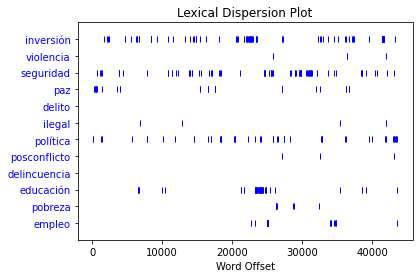

In [36]:
# Gráfico de dispersión de palabras de interés para la investigación
tokens_nltk2018 = nltk.Text(tokens_of_interest2018)
type(tokens_of_interest2018)
tokens_nltk2018.dispersion_plot(['inversión', "violencia", "seguridad", "paz", "delito", "ilegal", "política", "posconflicto", "delincuencia", "educación", "pobreza", "empleo"])

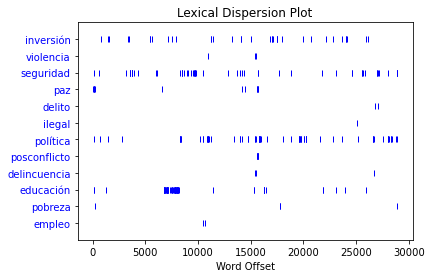

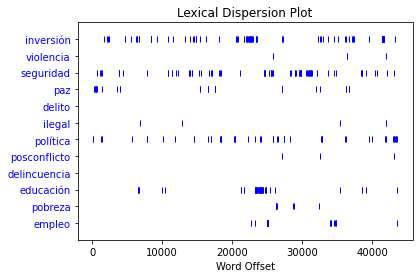

In [37]:
# Comparación de los dos diagramas de dispersión de texto de los planes de desarrollo
tokens_nltk2014.dispersion_plot(['inversión', "violencia", "seguridad", "paz", "delito", "ilegal", "política", "posconflicto", "delincuencia", "educación", "pobreza", "empleo"])
tokens_nltk2018.dispersion_plot(['inversión', "violencia", "seguridad", "paz", "delito", "ilegal", "política", "posconflicto", "delincuencia", "educación", "pobreza", "empleo"])

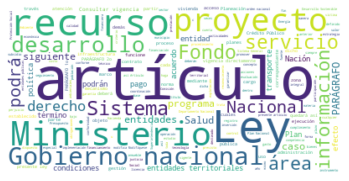

In [40]:
# Grafica de nube de palabras del Plan de Desarrollo de Santos

stopwords = set(STOPWORDS)
N2014 = WordCloud(
    background_color='white',
    max_words=274058,
    stopwords=stopwords_esp
)

# generate the word cloud
N2014.generate(PND_2014)
plt.imshow(N2014, interpolation='bilinear')
plt.axis('off')
plt.show()

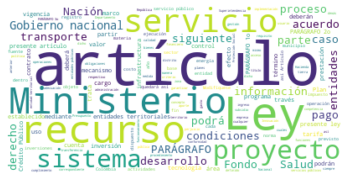

In [41]:
# Grafica de nube de palabras del Plan de Desarrollo de Duque

stopwords = set(STOPWORDS)
N2018 = WordCloud(
    background_color='white',
    max_words=274058,
    stopwords=stopwords_esp
)

# generate the word cloud
N2018.generate(PND_2018)
plt.imshow(N2018, interpolation='bilinear')
plt.axis('off')
plt.show()

In [42]:
#Determinando la concordancia de la palabra "posconflicto" para PND de 2014 

PND2014_nltk = nltk.Text(PND_2014.split())
PND2014_nltk.concordance('posconflicto')

#Determinando la concordancia de la palabra "posconflicto" para PND de 2018

PND2018_nltk = nltk.Text(PND_2018.split())
PND2018_nltk.concordance('posconflicto')

Displaying 2 of 2 matches:
l Consejo Interinstitucional del Posconflicto como organismo consultivo y coor
ribuyan de manera fundamental al posconflicto y a la construcción de paz. El C
Displaying 1 of 1 matches:
 de Información Integral para el Posconflicto (SIIPO), o el que para estos fin


In [43]:
# Obteniendo datos para realizar el modelo desde la API

#1) Estadísticas en educación en preescolar, básica y media por departamento del Ministerio de Educación Nacional
client = Socrata("www.datos.gov.co", None)
MEN = client.get_metadata("ji8i-4anb")
df = client.get("ji8i-4anb",
                content_type="csv")
columns = df[0]
del(df[0])
df = pd.DataFrame(df)
df

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,2011,5,Antioquia,1288473,94.01,93.85,70.28,94.12,75.68,44.37,...,2.06,0.07,1.8,2.54,2.96,4.25,0.07,4.56,5.27,1.68
1,2011,8,Atlántico,523935,99.32,99.05,50.59,98.93,80.22,50.17,...,0.54,0.12,0.45,0.67,0.75,1.82,0.12,1.77,2.18,0.88
2,2011,11,"Bogotá, D.C.",1479334,90.7,90.29,68.63,86.99,84.7,55.01,...,0,0,0,0,0,3.23,0,2.3,5.11,2.57
3,2011,13,Bolívar,496676,91.57,91.4,59.74,90.81,67.34,39.17,...,2.1,0.46,1.59,2.75,3.67,4.43,0.46,4.44,5.37,2.28
4,2011,15,Boyacá,300501,86.16,86.11,63.36,82.5,74.65,49.09,...,2.73,0.17,1.66,4.31,3.26,2.62,0.17,1.9,4.19,1.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,2020,91,Amazonas,22563,81.26,81.24,50.16,79.55,60.21,30.42,...,8.91,0.06,4.73,15.10,17.91,10.00,0.06,10.63,12.25,6.80
326,2020,94,Guainía,15771,70.52,70.51,55.92,69.96,33.54,10.73,...,15.01,4.16,12.01,24.57,17.45,10.50,4.16,11.43,13.99,3.60
327,2020,95,Guaviare,21482,83.07,83.06,43.30,76.41,67.80,34.28,...,8.92,1.25,5.17,15.58,10.36,6.04,1.25,5.45,8.77,3.37
328,2020,97,Vaupés,15910,53.47,53.47,30.55,54.96,31.22,13.32,...,16.28,6.67,18.32,14.86,14.76,7.15,6.67,7.86,7.44,5.08


In [44]:
df.columns = columns
df

,ano,c_digo_departamento,departamento,poblacion_5_16,tasa_matriculacion_5_16,cobertura_neta,cobertura_neta_transicion,cobertura_neta_primaria,cobertura_neta_secundaria,cobertura_neta_media,...,reprobacion,reprobacion_transicion,reprobacion_primaria,reprobacion_secundaria,reprobacion_media,repitencia,repitencia_transicion,repitencia_primaria,repitencia_secundaria,repitencia_media
0,2011,5,Antioquia,1288473,94.01,93.85,70.28,94.12,75.68,44.37,...,2.06,0.07,1.8,2.54,2.96,4.25,0.07,4.56,5.27,1.68
1,2011,8,Atlántico,523935,99.32,99.05,50.59,98.93,80.22,50.17,...,0.54,0.12,0.45,0.67,0.75,1.82,0.12,1.77,2.18,0.88
2,2011,11,"Bogotá, D.C.",1479334,90.7,90.29,68.63,86.99,84.7,55.01,...,0,0,0,0,0,3.23,0,2.3,5.11,2.57
3,2011,13,Bolívar,496676,91.57,91.4,59.74,90.81,67.34,39.17,...,2.1,0.46,1.59,2.75,3.67,4.43,0.46,4.44,5.37,2.28
4,2011,15,Boyacá,300501,86.16,86.11,63.36,82.5,74.65,49.09,...,2.73,0.17,1.66,4.31,3.26,2.62,0.17,1.9,4.19,1.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,2020,91,Amazonas,22563,81.26,81.24,50.16,79.55,60.21,30.42,...,8.91,0.06,4.73,15.10,17.91,10.00,0.06,10.63,12.25,6.80
326,2020,94,Guainía,15771,70.52,70.51,55.92,69.96,33.54,10.73,...,15.01,4.16,12.01,24.57,17.45,10.50,4.16,11.43,13.99,3.60
327,2020,95,Guaviare,21482,83.07,83.06,43.30,76.41,67.80,34.28,...,8.92,1.25,5.17,15.58,10.36,6.04,1.25,5.45,8.77,3.37
328,2020,97,Vaupés,15910,53.47,53.47,30.55,54.96,31.22,13.32,...,16.28,6.67,18.32,14.86,14.76,7.15,6.67,7.86,7.44,5.08


In [46]:
Matrículas= df.loc[:, ['ano', 'c_digo_departamento', 'departamento','tasa_matriculacion_5_16','cobertura_neta','desercion']]
Matrículas.to_csv('Matrículas.csv')# La exportamos a formato .csv
Matrículas

,ano,c_digo_departamento,departamento,tasa_matriculacion_5_16,cobertura_neta,desercion
0,2011,5,Antioquia,94.01,93.85,3.97
1,2011,8,Atlántico,99.32,99.05,2.76
2,2011,11,"Bogotá, D.C.",90.7,90.29,3.95
3,2011,13,Bolívar,91.57,91.4,3.14
4,2011,15,Boyacá,86.16,86.11,3.07
...,...,...,...,...,...,...
325,2020,91,Amazonas,81.26,81.24,2.37
326,2020,94,Guainía,70.52,70.51,3.53
327,2020,95,Guaviare,83.07,83.06,4.41
328,2020,97,Vaupés,53.47,53.47,2.54


In [47]:
# Ahora se construye la base de datos desde la fuente:

#Cultivos de coca: https://www.minjusticia.gov.co/programas-co/ODC/Paginas/SIDCO-departamento-municipio.aspx
#Inversión del Sistema General de Regalías:https://www.sgr.gov.co/Vigilancia/ResultadoseInformes.aspx
#Sistema de Información Red de Desaparecidos y Cadáveres - SIRDEC:  https://www.medicinalegal.gov.co/cifras-de-lesiones-de-causa-externa
#PIB:https://dane.gov.co/index.php/estadisticas-por-tema/cuentas-nacionales/cuentas-nacionales-trimestrales/historicos-producto-interno-bruto-pib
#Tasa de desempleo:Fuente: https://www.datos.gov.co/Estad-sticas-Nacionales/Gran-Encuesta-Integrada-de-Hogares-GEIH/mcpt-3dws
#Encuesta Nacional de Calidad de Vida:https://www.dane.gov.co/index.php/estadisticas-por-tema/pobreza-y-condiciones-de-vida/calidad-de-vida-ecv

#Nota: Las bases de datos obtenidas fueron procesadas en Excel obteniendo la base de datos "Homicidios_posconflicto" 
# Importamos la base
H_posc= pd.read_csv('Homicidios_posconflicto.csv')
# Visualizamos la base
pd.read_csv('Homicidios_posconflicto.csv') 


,AÑO,N°,DEPARTAMENTO Y MUNICIPIO DEL HECHO DANE / MAYOR DE EDAD (> 18 AÑOS) O MENOR DE EDAD (< 18 AÑOS),HOMBRE,MUJER,TOTAL,PIB,TASA DE DESEMPLEO,POBLACI�N TOTAL,CULTIVOS ÍLICITOS COCA (Hectareas),INVERSI�N EN REGALÍAS PESOS,POBREZA MULTIDIMENSIONAL
0,2020,5,Antioquia,1703,137,1840,609,15.925870,6848.047,12090.19,3.425921e+11,14.9
1,2020,8,Atlántico,493,38,531,122644,10.795082,2602.059,0.00,5.924801e+10,14.1
2,2020,11,Bogotá,945,95,1040,4577,18.192695,8363.103,0.00,7.686410e+10,7.5
3,2020,13,Bolívar,386,28,414,36557,10.227424,2220.937,9373.25,2.858789e+11,28.1
4,2020,15,Boyacá,69,9,78,214905,12.212039,1287.560,6.35,1.193061e+11,11.7
...,...,...,...,...,...,...,...,...,...,...,...,...
160,2016,91,Amazonas,14,-,14,6807,NaN,73790.000,166.77,0.000000e+00,NaN
161,2016,94,Guainía,2,-,2,17708,NaN,44722.000,21.61,1.645628e+10,NaN
162,2016,95,Guaviare,16,2,18,80022,NaN,78796.000,6837.99,4.118851e+10,NaN
163,2016,97,Vaupés,62,5,67,236,NaN,38737.000,96.66,1.353330e+10,NaN


In [49]:
# Importamos la base de datos de matrículas
Matr= pd.read_csv('Matrículas.csv')
# Visualizamos la base
pd.read_csv('Matrículas.csv')

,Unnamed: 0,ano,c_digo_departamento,departamento,tasa_matriculacion_5_16,cobertura_neta,desercion
0,0,2011,5,Antioquia,94.01,93.85,3.97
1,1,2011,8,Atlántico,99.32,99.05,2.76
2,2,2011,11,"Bogotá, D.C.",90.70,90.29,3.95
3,3,2011,13,Bolívar,91.57,91.40,3.14
4,4,2011,15,Boyacá,86.16,86.11,3.07
...,...,...,...,...,...,...,...
325,325,2020,91,Amazonas,81.26,81.24,2.37
326,326,2020,94,Guainía,70.52,70.51,3.53
327,327,2020,95,Guaviare,83.07,83.06,4.41
328,328,2020,97,Vaupés,53.47,53.47,2.54


In [50]:
# Elimino datos de los años que no tengo información en la base "Matrículas" respecto a la base "Homicidios_posconflicto" 
matr2=Matr[Matr["ano"]<=2015].index
matrículas2=Matr.drop(matr2)
Matrículas_base= matrículas2.rename(columns={'c_digo_departamento':'N°'})
Matrículas_base2=Matrículas_base.sort_values('ano',ascending=False)
Matrículas_base2

,Unnamed: 0,ano,N°,departamento,tasa_matriculacion_5_16,cobertura_neta,desercion
329,329,2020,99,Vichada,60.15,60.14,3.07
304,304,2020,19,Cauca,85.00,84.97,1.59
311,311,2020,47,Magdalena,96.03,95.83,3.87
310,310,2020,44,La Guajira,94.28,94.20,2.08
309,309,2020,41,Huila,93.46,93.38,2.49
...,...,...,...,...,...,...,...
194,194,2016,94,Guainia,77.60,77.64,8.21
195,195,2016,95,Guaviare,54.80,54.83,4.70
196,196,2016,97,Vaupes,64.20,64.17,6.60
197,197,2016,99,Vichada,77.80,77.78,8.16


In [51]:
#Unir las dos bases de datos "Matrículas_base2" y "Homicidios_posconflicto"
# Elimino variables repetidas dejando N° comó único identificador para la base "Matrículas_base2"
Matrículas_base = Matrículas_base2.drop(['ano','departamento', "Unnamed: 0"], axis=1)
Matrículas_base
dataset=pd.merge(H_posc, Matrículas_base, on='N°', how='left')
dataset2 = dataset.drop_duplicates(subset=['POBLACI�N TOTAL'])
dataset2

,AÑO,N°,DEPARTAMENTO Y MUNICIPIO DEL HECHO DANE / MAYOR DE EDAD (> 18 AÑOS) O MENOR DE EDAD (< 18 AÑOS),HOMBRE,MUJER,TOTAL,PIB,TASA DE DESEMPLEO,POBLACI�N TOTAL,CULTIVOS ÍLICITOS COCA (Hectareas),INVERSI�N EN REGALÍAS PESOS,POBREZA MULTIDIMENSIONAL,tasa_matriculacion_5_16,cobertura_neta,desercion
0,2020,5,Antioquia,1703,137,1840,609,15.925870,6848.047,12090.19,3.425921e+11,14.9,93.59,93.43,2.30
5,2020,8,Atlántico,493,38,531,122644,10.795082,2602.059,0.00,5.924801e+10,14.1,92.75,92.38,1.41
10,2020,11,Bogotá,945,95,1040,4577,18.192695,8363.103,0.00,7.686410e+10,7.5,96.41,95.89,0.46
15,2020,13,Bolívar,386,28,414,36557,10.227424,2220.937,9373.25,2.858789e+11,28.1,98.91,98.80,2.03
20,2020,15,Boyacá,69,9,78,214905,12.212039,1287.560,6.35,1.193061e+11,11.7,94.91,94.84,1.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,2016,91,Amazonas,14,-,14,6807,NaN,73790.000,166.77,0.000000e+00,NaN,81.26,81.24,2.37
805,2016,94,Guainía,2,-,2,17708,NaN,44722.000,21.61,1.645628e+10,NaN,70.52,70.51,3.53
810,2016,95,Guaviare,16,2,18,80022,NaN,78796.000,6837.99,4.118851e+10,NaN,83.07,83.06,4.41
815,2016,97,Vaupés,62,5,67,236,NaN,38737.000,96.66,1.353330e+10,NaN,53.47,53.47,2.54


In [54]:
# Reemplazo los valores perdidos (Nan) en la mediana de los datos.
dataset3=dataset2.fillna(dataset2.median())
dataset4= dataset3.rename(columns={"AÑO":"Año","HOMBRE":"Hombre","MUJER":"Mujer",'DEPARTAMENTO Y MUNICIPIO DEL HECHO DANE / MAYOR DE EDAD (> 18 AÑOS) O MENOR DE EDAD (< 18 AÑOS)':'Departamento', 'TOTAL':'Homicidios','TASA DE DESEMPLEO':'Tasa_desempleo','POBLACI�N TOTAL':'Poblc_total','CULTIVOS ÍLICITOS COCA (Hectareas)':'Ha_Coca','INVERSI�N EN REGALÍAS PESOS':'Inv_reg', 'POBREZA MULTIDIMENSIONAL':'Pobre_multi','tasa_matriculacion_5_16':'Tasa_matricula'})
dataset4

,Año,N°,Departamento,Hombre,Mujer,Homicidios,PIB,Tasa_desempleo,Poblc_total,Ha_Coca,Inv_reg,Pobre_multi,Tasa_matricula,cobertura_neta,desercion
0,2020,5,Antioquia,1703,137,1840,609,15.925870,6848.047,12090.19,3.425921e+11,14.9,93.59,93.43,2.30
5,2020,8,Atlántico,493,38,531,122644,10.795082,2602.059,0.00,5.924801e+10,14.1,92.75,92.38,1.41
10,2020,11,Bogotá,945,95,1040,4577,18.192695,8363.103,0.00,7.686410e+10,7.5,96.41,95.89,0.46
15,2020,13,Bolívar,386,28,414,36557,10.227424,2220.937,9373.25,2.858789e+11,28.1,98.91,98.80,2.03
20,2020,15,Boyacá,69,9,78,214905,12.212039,1287.560,6.35,1.193061e+11,11.7,94.91,94.84,1.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,2016,91,Amazonas,14,-,14,6807,10.143432,73790.000,166.77,0.000000e+00,26.7,81.26,81.24,2.37
805,2016,94,Guainía,2,-,2,17708,10.143432,44722.000,21.61,1.645628e+10,26.7,70.52,70.51,3.53
810,2016,95,Guaviare,16,2,18,80022,10.143432,78796.000,6837.99,4.118851e+10,26.7,83.07,83.06,4.41
815,2016,97,Vaupés,62,5,67,236,10.143432,38737.000,96.66,1.353330e+10,26.7,53.47,53.47,2.54


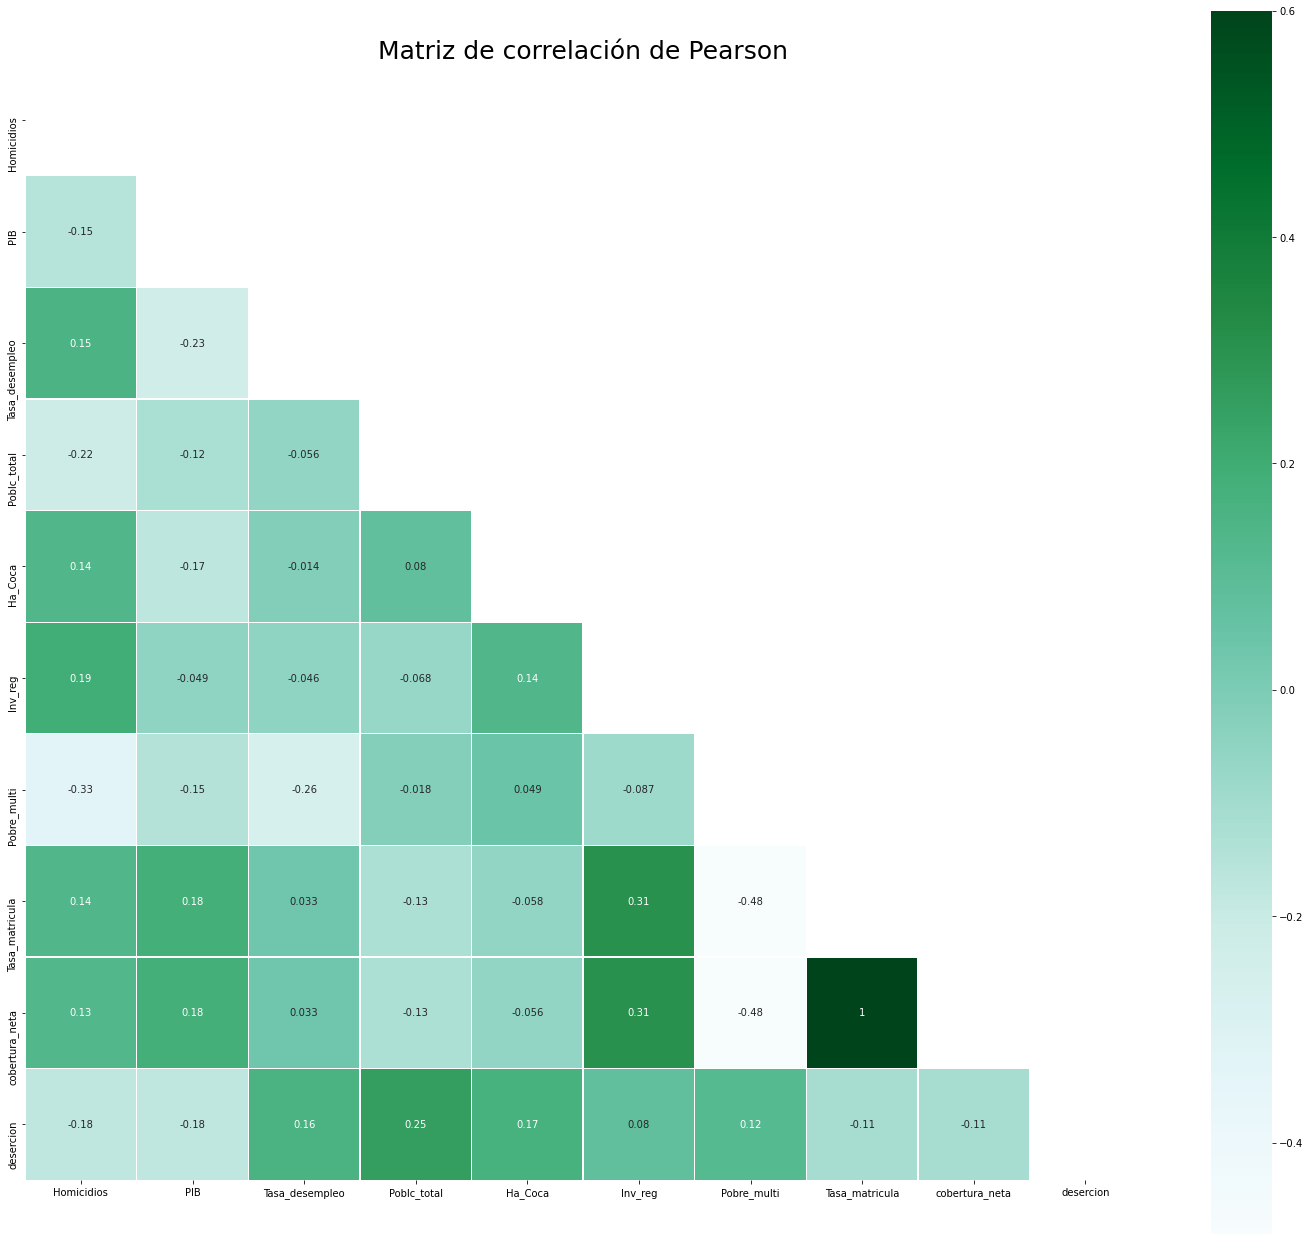

In [57]:
#Graficando matríz de correlación

features = ["Homicidios", 'PIB', 'Tasa_desempleo', 'Poblc_total', 'Ha_Coca', 'Inv_reg', 'Pobre_multi', 'Tasa_matricula', 'cobertura_neta', 'desercion'] 
# Generar una matriz de False del tamaño de la de correlación
mask = np.zeros_like(dataset4[features].corr())
# Hacer True la digonal superior
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(25, 25))
plt.title('Matriz de correlación de Pearson',fontsize=25)

# Plot de correlación
sns.heatmap(dataset4[features].corr(),linewidths=0.25,vmax=0.6,square=True,cmap="BuGn",
            linecolor='w',annot=True,annot_kws={"size":10},mask=mask, cbar_kws={"shrink": .9});

In [60]:
# Se realiza el modelo que explique los homicidios en el posconflicto
# Establecer la regresión lineal múltiple estimar
model = smf.ols(formula = 'Homicidios ~ PIB + Tasa_desempleo + Ha_Coca + Inv_reg + Tasa_matricula + cobertura_neta + desercion + Departamento', data = dataset4)
# Resultados del ajuste 
res = model.fit()
# Imprimir el resultado
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             Homicidios   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     209.2
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           1.80e-97
Time:                        21:35:42   Log-Likelihood:                -921.26
No. Observations:                 165   AIC:                             1917.
Df Residuals:                     128   BIC:                             2031.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

Análisis del Modelo:

El modelo obtenido presenta un ajuste del 98% e indica que las variables más relevantes para explicar el comportamiento de los homicidios en el pais son: la inversión de regalias, la tasa de matrícula escolar y la cobertura en educación con un nivel de significancia del 10% y con un nivel de significancia del 5% los departamentos que explican una mayor ocurrencia de homicidios son: Antioquia, Cauca, Norte de Santander, Valle del Cauca, Cesar, Vaupes, Vichada, Chocó, Bolivar, Cundinamarca, Córdoba y Bogotá.

En Antioquia los homicidios en promedio incrementan en 1.662 personas que en el resto del pais
En Bogotá los homicidios en promedio incrmentan en 662 personas que en el resto del pais
En Bolivar los homicidios en promedio incrmentan en 170 personas que en el resto del pais  
En Cauca los homicidios en promedio incrmentan en 369 personas que en el resto del pais  
En Cesar los homicidios en promedio incrmentan en 107 personas que en el resto del pais
En Chocó los homicidios en promedio incrmentan en 132  personas que en el resto del pais

Analisis de datos: La visualización de datos se realizó a través de Power-BI:

https://app.powerbi.com/view?r=eyJrIjoiN2I5MDFmY2QtMDJmNS00N2JlLWEyYWQtNTczNTRlYjc4Y2U0IiwidCI6ImFlNTI1NzU3LTg5YmEtNGQzMC1hMmY3LTQ5Nzk2ZWY4YzYwNCIsImMiOjR9


Conclusión:

En el Plan Nacional de Desarrollo de Santos se priorizaron más los temas relacionados con el posconflicto, sin embargo, los homicidios se duplicaron en el año 2018. Durante el Gobierno de Duque los homicidios han venido decreciendo usualmente como efecto del confinamiento en los territorios.
Los departamentos con más ocurrencia de homicidios son Valle del Cauca y Antioquia
La población más afectada con este flagelo son los hombres en una proporciòn del 91,35% en el año 2018 donde ocurriò un mayor número de indicentes, registrandose 11.075 homicidios.
Las variables que más tienen incidencia en la disminución de la ocurrencia de homicidios, es incrento del PIB, incremento en inversión en regalías, disminuciòn de la pobreza multidimencional, aumento en la tasa de matricula  escolar.